<a href="https://colab.research.google.com/github/hxvrtbxvt/machine_learning/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df = pd.read_csv('train-2.csv')
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Is_Active']=le.fit_transform(df['Is_Active'])
df['Occupation']=le.fit_transform(df['Occupation'])


scaler = StandardScaler()
df[['Vintage', 'Avg_Account_Balance']] = scaler.fit_transform(df[['Vintage', 'Avg_Account_Balance']])



df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,1,X3,-0.122373,No,-0.096968,0,0
1,IDD62UNG,0,30,RG277,2,X1,-0.462372,No,-0.640630,0,0
2,HD3DSEMC,0,56,RG268,3,X3,-0.647825,No,0.417279,1,0
3,BF3NC7KV,1,34,RG270,2,X1,-0.864188,No,-0.771395,0,0
4,TEASRWXV,0,30,RG282,2,X1,-0.431463,No,-0.283276,0,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,3,X3,1.917619,NaN,0.934635,0,0
245721,HFNB7JY8,1,27,RG268,2,X1,-0.987824,No,-0.311221,1,0
245722,GEHAUCWT,0,26,RG281,2,X1,-1.049642,No,-0.536670,0,0
245723,GE7V8SAH,0,28,RG273,2,X1,-0.493281,No,-0.845199,0,0


In [ ]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
new_df = df.drop(["Credit_Product", "Region_Code","Channel_Code", "ID"], axis=1)
new_df

,Gender,Age,Occupation,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,-0.122373,-0.096968,0,0
1,0,30,2,-0.462372,-0.640630,0,0
2,0,56,3,-0.647825,0.417279,1,0
3,1,34,2,-0.864188,-0.771395,0,0
4,0,30,2,-0.431463,-0.283276,0,0
...,...,...,...,...,...,...,...
245720,1,51,3,1.917619,0.934635,0,0
245721,1,27,2,-0.987824,-0.311221,1,0
245722,0,26,2,-1.049642,-0.536670,0,0
245723,0,28,2,-0.493281,-0.845199,0,0


In [ ]:
import sklearn.linear_model as sk
from sklearn.model_selection import train_test_split

In [ ]:
model = sk.LogisticRegression()
train, test = train_test_split(new_df, test_size=0.3) 

print(train.shape)
print(test.shape)

(172007, 7)
(73718, 7)


In [ ]:
train_x = train.drop(["Age","Is_Lead"], axis=1)
train_y = train['Is_Lead']

test_x = train.drop(["Age","Is_Lead"], axis=1)
test_y = train['Is_Lead']



train_x.head()


test_x.head()

model.fit(train_x,train_y)

pred_y= model.predict(test_x)

pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
labels_dict = {
    "predicted" : list(pred_y),
    "ground truth": test_y
}

labels_dict

{'ground truth': 188172    0
 149704    0
 159039    1
 18983     0
 243315    1
          ..
 101160    0
 213846    0
 43910     1
 211755    0
 81715     0
 Name: Is_Lead, Length: 172007, dtype: int64,
 'predicted': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [ ]:
from numpy.ma.core import negative
labels_df = pd.DataFrame(labels_dict)

labels_df

,predicted,ground truth
188172,0,0
149704,0,0
159039,0,1
18983,0,0
243315,0,1
...,...,...
101160,0,0
213846,0,0
43910,0,1
211755,0,0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y,pred_y)

0.7531553948385822

In [ ]:
from sklearn.metrics import precision_score

precision_score(test_y, pred_y, average='macro')

0.5733313226421981

In [ ]:
from sklearn.metrics import recall_score

recall_score(test_y, pred_y, average='macro')

0.5153461868321874

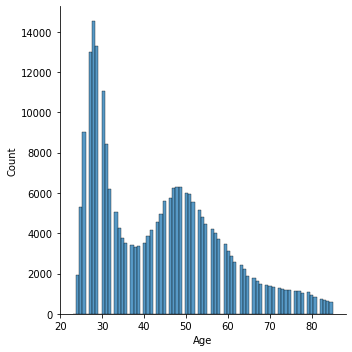

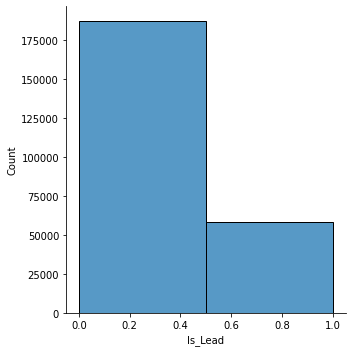

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.displot(new_df.Age)



sns.displot(new_df.Is_Lead, bins = 2)